**Nom**: Betis

**Prénom:** Mohamed Dhia 

**E-mail:** mohamed.dhia.betis@essai.ucar.tn 


## 1. Importing libraries

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/south-african-heart-disease-dataset/SAHeart.csv


## 2. Importing and Exploring the Data


In [38]:
data=pd.read_csv("/kaggle/input/south-african-heart-disease-dataset/SAHeart.csv")

In [39]:
print(data.head())

   row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1  


In [40]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB
None


In [41]:
print(data.describe())

        row.names         sbp     tobacco         ldl   adiposity       typea  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   231.935065  138.326840    3.635649    4.740325   25.406732   53.103896   
std    133.938585   20.496317    4.593024    2.070909    7.780699    9.817534   
min      1.000000  101.000000    0.000000    0.980000    6.740000   13.000000   
25%    116.250000  124.000000    0.052500    3.282500   19.775000   47.000000   
50%    231.500000  134.000000    2.000000    4.340000   26.115000   53.000000   
75%    347.750000  148.000000    5.500000    5.790000   31.227500   60.000000   
max    463.000000  218.000000   31.200000   15.330000   42.490000   78.000000   

          obesity     alcohol         age         chd  
count  462.000000  462.000000  462.000000  462.000000  
mean    26.044113   17.044394   42.816017    0.346320  
std      4.213680   24.481059   14.608956    0.476313  
min     14.700000    0.000000   15.000000    0

In [42]:
print(data.isnull().sum())

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


In [43]:
# Encode categorical variable 'famhist' to numerical
data['famhist'] = data['famhist'].map({'Present': 1, 'Absent': 0})

In [44]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

## 3. Data visualization

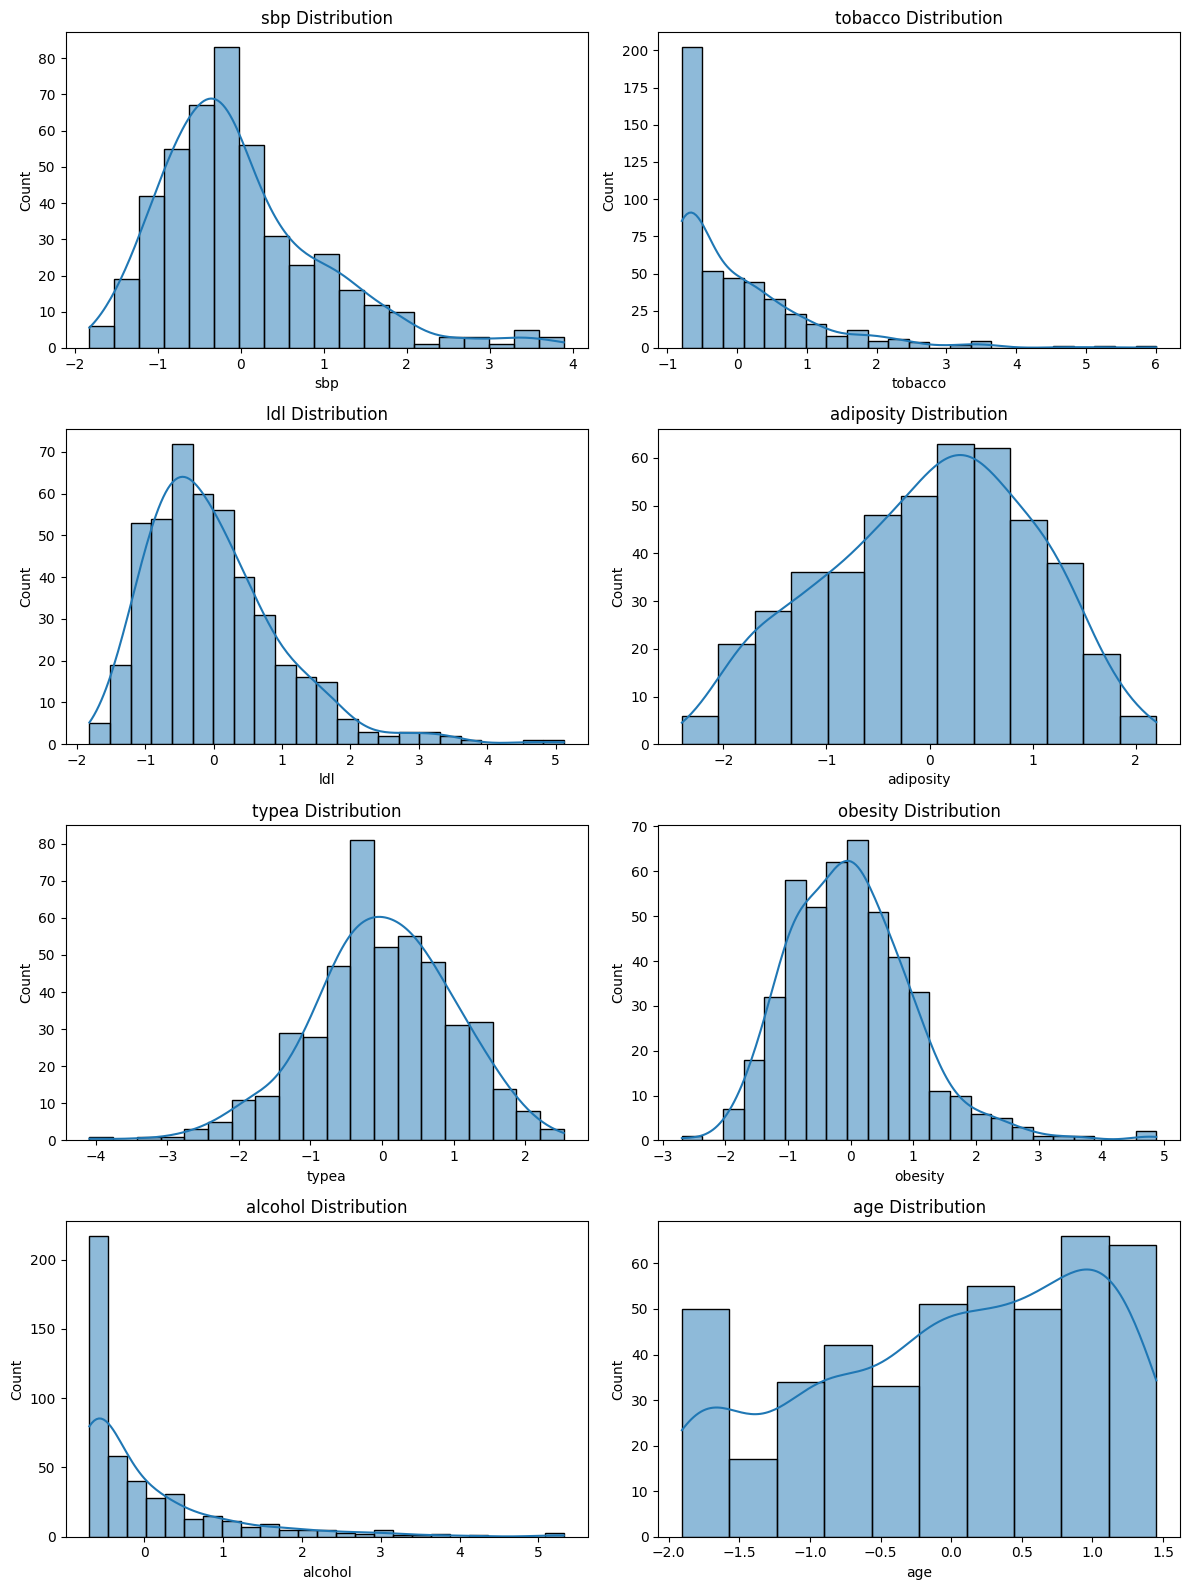

In [45]:
# Histograms and Boxplots for numerical variables
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(col + " Distribution")

plt.tight_layout()
plt.show()

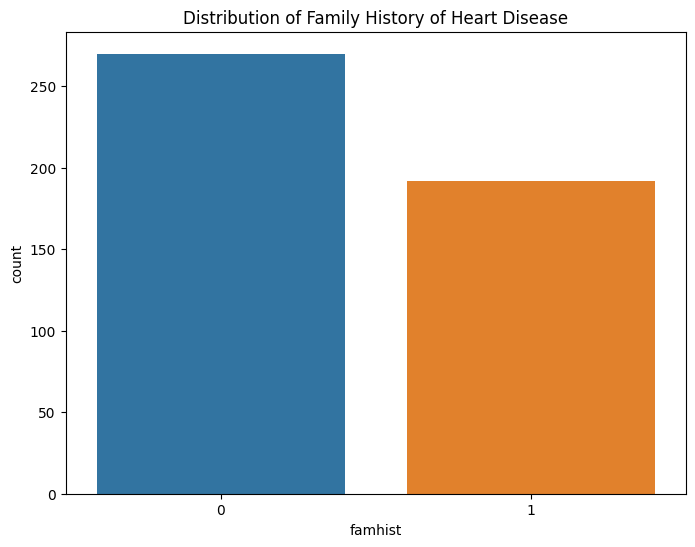

In [46]:
# Countplot for categorical variable 'famhist'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='famhist')
plt.title("Distribution of Family History of Heart Disease")
plt.show()

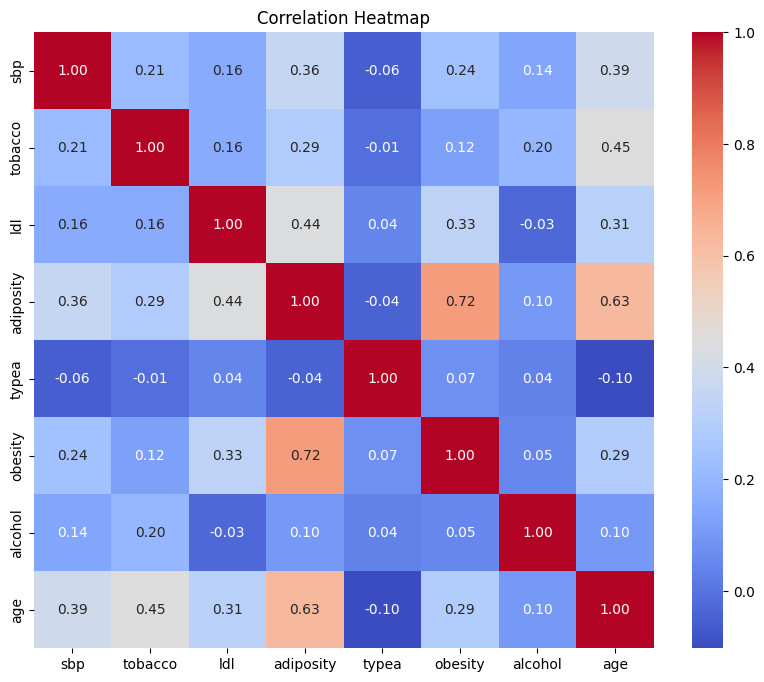

In [47]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


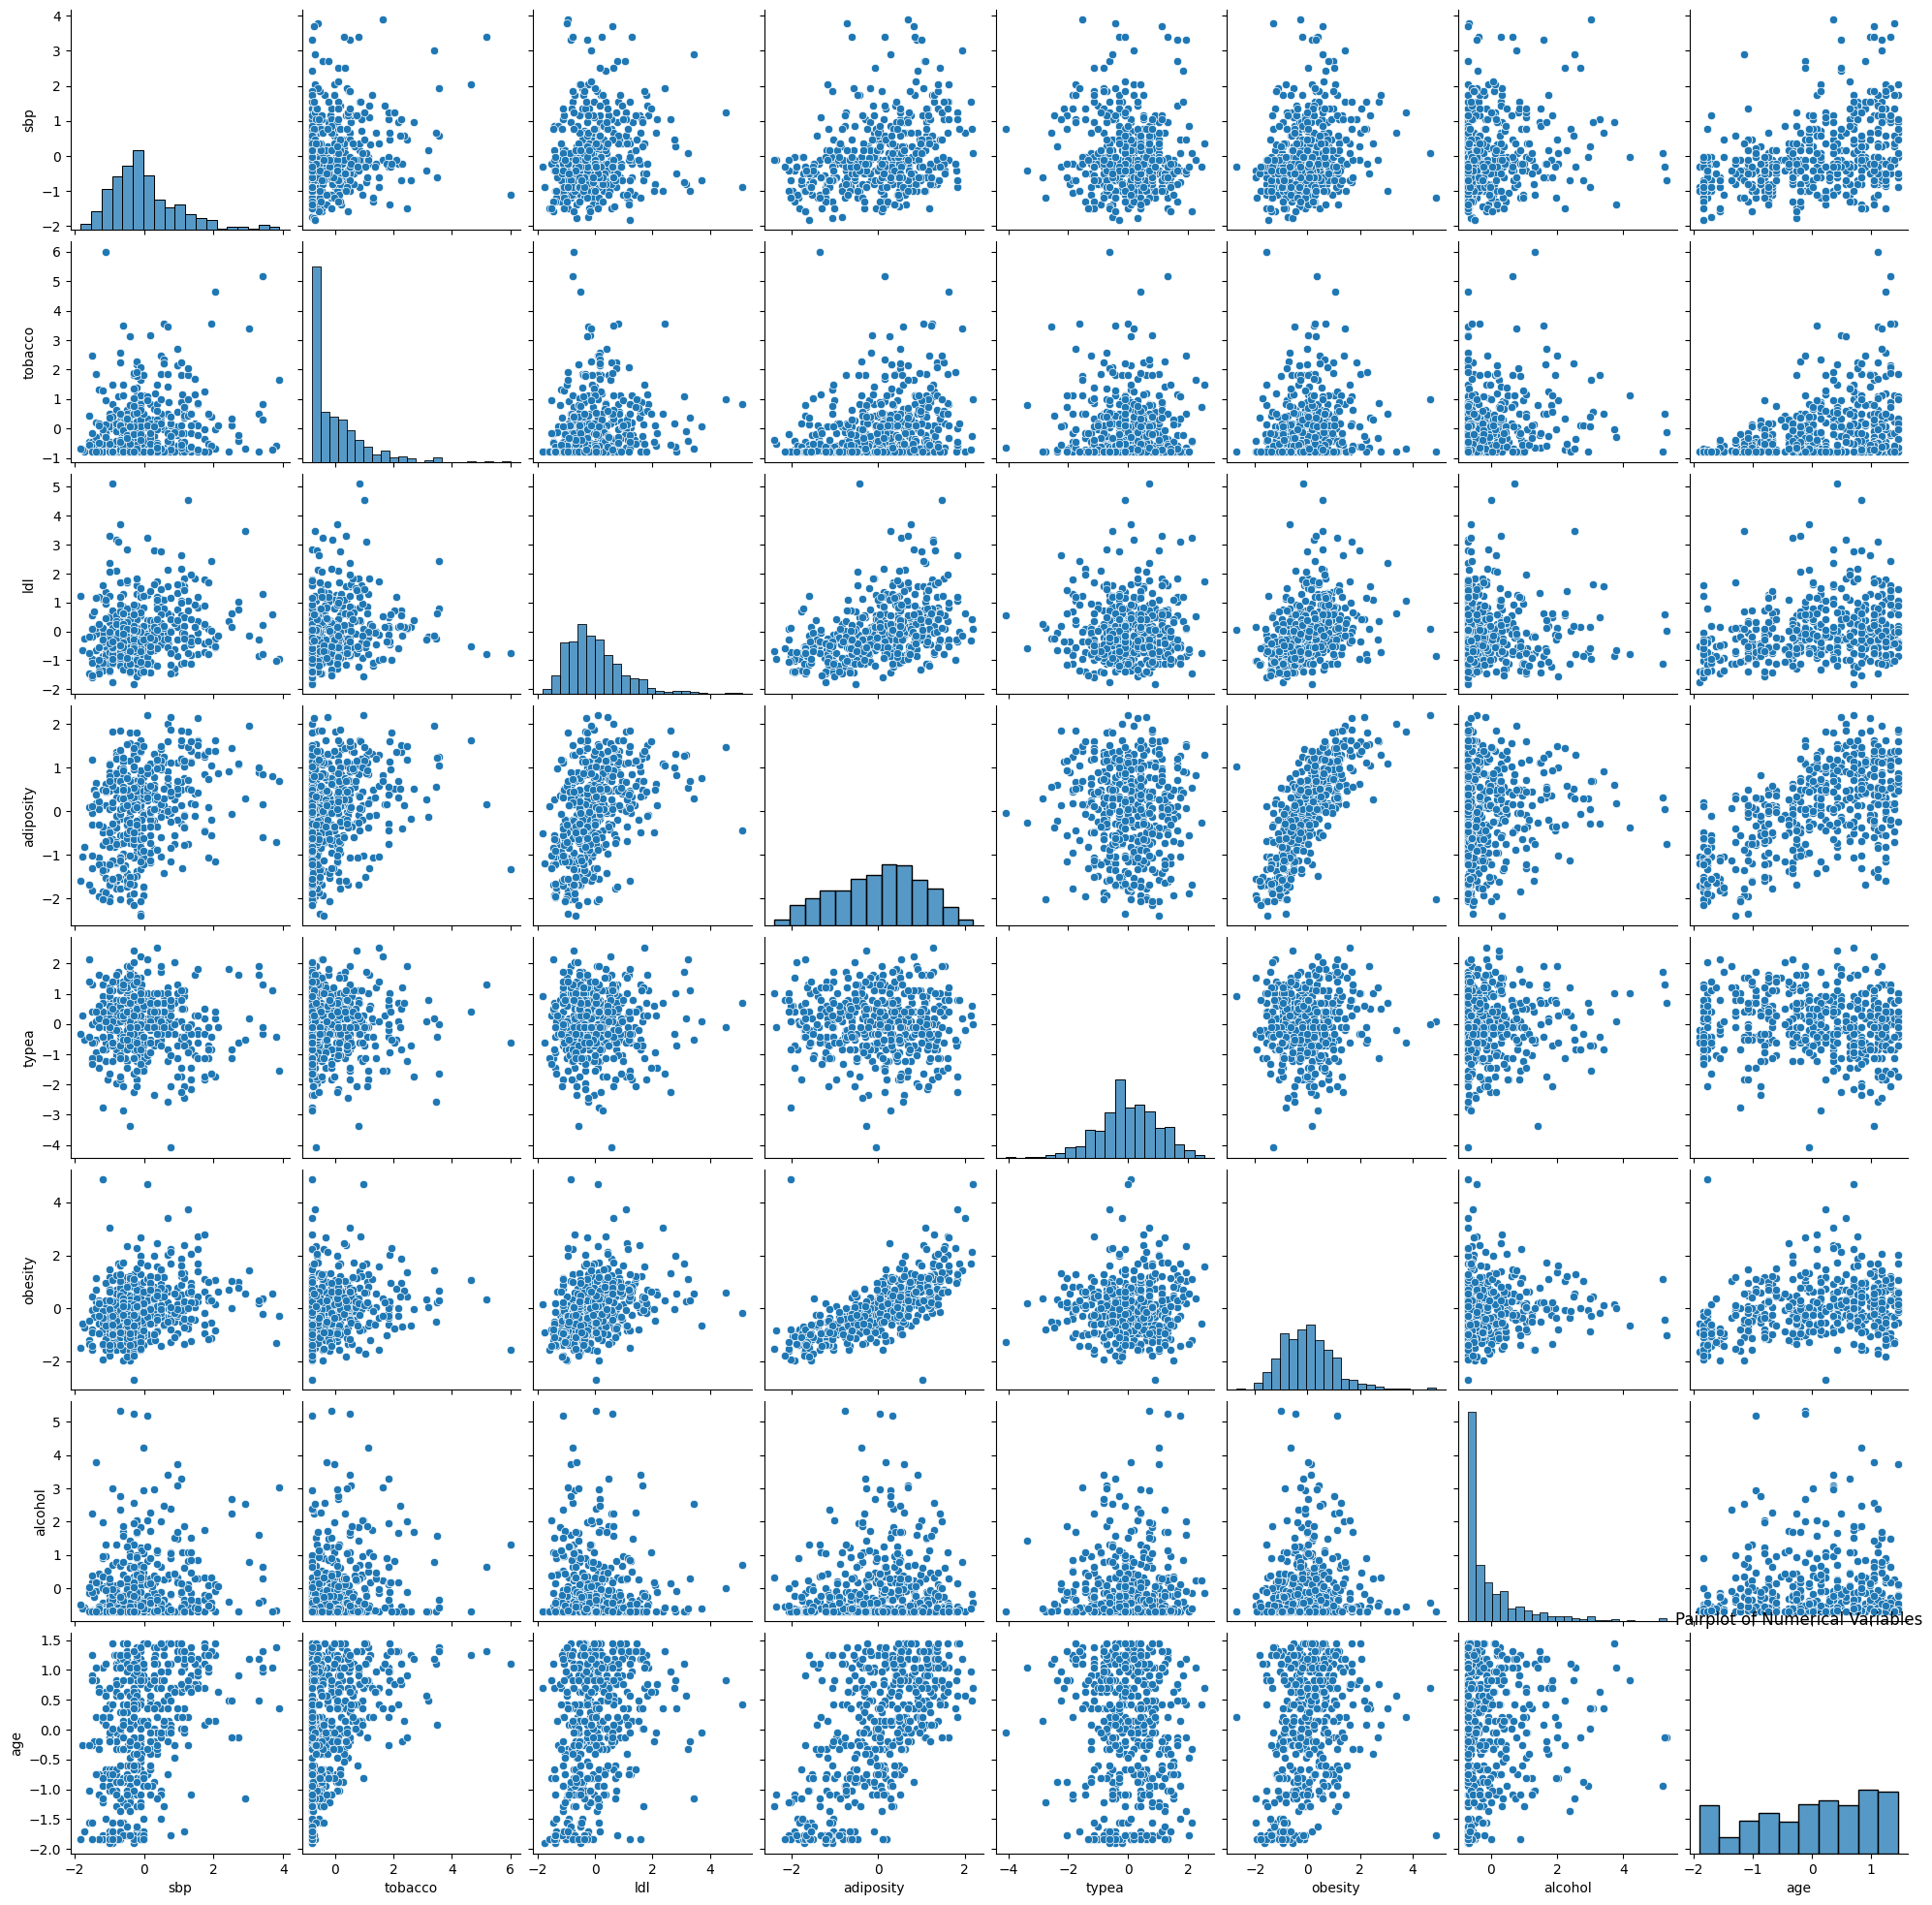

In [48]:
# Pairplot (Note: Pairplot may take some time to generate if there are many numerical variables)
sns.pairplot(data[numerical_cols])
plt.title("Pairplot of Numerical Variables")
plt.show()

## 4. Gradient Descent
**Compute the cost function for linear regression.**
    
   Parameters:
        X: numpy array, shape (m, n+1), where m is the number of examples and n is the number of features.
           The first column of X should be all ones (for the intercept term).
        y: numpy array, shape (m,), containing the target values.
        theta: numpy array, shape (n+1,), containing the parameters.
        
   Returns:
        cost: float, the computed cost.


In [49]:
import numpy as np

# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)  # number of examples
    h = X.dot(theta)  # predicted values
    squared_error = (h - y) ** 2
    cost = 1 / (2 * m) * np.sum(squared_error)
    return cost


**Perform gradient descent to minimize the cost function.**
    
   Parameters:
        X: numpy array, shape (m, n+1), where m is the number of examples and n is the number of features.
           The first column of X should be all ones (for the intercept term).
        y: numpy array, shape (m,), containing the target values.
        theta: numpy array, shape (n+1,), containing the initial parameters.
        alpha: float, the learning rate.
        num_iterations: int, the number of iterations.
        
   Returns:
        theta: numpy array, shape (n+1,), the optimized parameters.
        cost_history: list, containing the cost at each iteration.

In [50]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)  # number of examples
    cost_history = []  # to store the cost at each iteration
    
    for i in range(num_iterations):
        h = X.dot(theta)  # predicted values
        error = h - y  # error (difference between predicted and actual values)
        gradient = X.T.dot(error) / m  # gradient of the cost function
        theta -= alpha * gradient  # update parameters
        cost = compute_cost(X, y, theta)  # compute the cost
        cost_history.append(cost)  # store the cost at each iteration
        
    return theta, cost_history


In [71]:
# Prepare the data
X = data[['tobacco']].values  # feature (independent variable)
y = data['chd'].values  # target variable

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((len(X), 1)), X]

# Initialize the parameters theta with zeros
theta_initial = np.zeros(2)

# Set hyperparameters
alpha = 0.01  # learning rate
num_iterations = 1000  # number of iterations

# Apply gradient descent
theta_optimized, cost_history = gradient_descent(X_b, y, theta_initial, alpha, num_iterations)

# Print the optimized parameters
print("Optimized parameters (theta_0, theta_1):", theta_optimized)


Optimized parameters (theta_0, theta_1): [0.3463054  0.14259848]


Optimized parameters (theta_0, theta_1): [0.3463054  0.14259848]

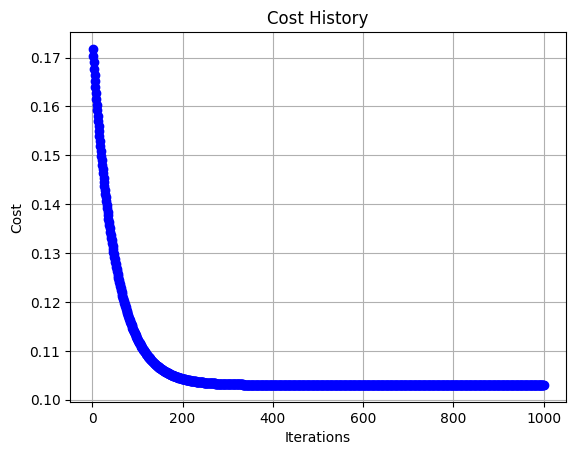

In [72]:
import matplotlib.pyplot as plt

# Plot the cost history
plt.plot(range(1, num_iterations + 1), cost_history, marker='o', color='b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.grid(True)
plt.show()


The cost function is converging